In [83]:
import sys
import pandas as pd
import numpy as np
import collections

import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm
from  matplotlib import cm

In [317]:
class Shanghan():
    def __init__(self):
        self.sh1 = pd.read_json('data/SH_ty2.json')
        self.wx1 = pd.read_json('data/WX_yao.json')
        self.wx = {y: sx for sx, yao in self.wx1.loc["药物"].iteritems() for y in yao}
        
    def count_fang(self,fang):
        a = self.sh1.loc['名'].str.match(fang).sum()
        print(a)
        
    def count_fang_all(self):
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        plt.rcParams['figure.figsize'] = [18,13]
        #plt.xlabel('药物')
        plt.title('伤寒论重复方剂出现排名分析(前5名)', pad = 90)
        plt.xticks(fontsize=25)#x轴的字体大小
        plt.yticks(fontsize=30)
        
        l1 = {}
        t_list = []
        n_list = []
        for i in self.sh1.loc['名'].items():
            l1[i[1]] = self.sh1.loc['名'].str.match(i[1]).sum()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
        
        for i in l2[:5]:
            t_list.append(i[0])
            n_list.append(i[1])
            #plt.text(i[1],)
        
        x = np.arange(10)
        ys = [i+x+(i*x)**2 for i in range(10)]
        colors = cm.rainbow(np.linspace(0, 1, len(ys)))
            
        plt.bar(t_list,n_list,color=colors)
        plt.show()
        #print(l2)
        
    def count_yao(self,yao):
        q1 = self.sh1.loc['方']
        q2 = q1[q1.apply(lambda x:yao in x)].count()
        print(q2)
        
    def count_yao_all(self):
        q1 = self.sh1.loc['方']
        l1 = {}
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
                
        print(l2)
        
    def draw_dir_all(self):#画每一个方剂的方向图
        plt.rcParams['figure.figsize'] = [18,13]
        plt.style.use('fivethirtyeight')
        fang = self.sh1.loc['方']
        sx = [self.wx.get(y,"暂不明") for f in fang for y in f]
        sx_len = len(sx)
        qq = {y: cnt / sx_len for y, cnt in collections.Counter(sx).items()}
        qq1 = sorted(qq.items(),key = lambda item: item[1], reverse=True)
        ss = {}
        for i in qq1:
            #print(i)
            ss[i[0]]=i[1]
        
        #----------------下面是画饼图-----------------------------------
        
        labels = list(ss.keys())
        X = list(ss.values())
        fig, ax = plt.subplots(figsize=(11,11))
        
        colors = cm.rainbow(np.arange(len(X))/len(X))
        #print(X)
        patches, texts, autotexts = ax.pie(X, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=170, colors=colors)
        
        proptease = fm.FontProperties()
        proptease.set_size('x-large')
        
        plt.setp(autotexts, fontproperties=proptease)
        plt.setp(texts, fontproperties=proptease)

        plt.title("伤寒全部方剂五行方向图", pad = 30)
        plt.axis('equal')
        plt.show()  
        
    def count_yao_all_draw(self):
        plt.style.use('fivethirtyeight')#这个图的设定字体很清晰
        plt.rcParams['figure.figsize'] = [18,13]
        #plt.xlabel('药物')
        plt.title('伤寒论药物用量排名分析(前10名)', pad = 90)
        plt.xticks(fontsize=25)#x轴的字体大小
        plt.yticks(fontsize=30)
        
        
        q1 = self.sh1.loc['方']
        l1 = {}
        t_list = []
        n_list = []
        for i ,j in self.sh1.loc['方'].iteritems():
            for g in j:
                l1[g]= q1[q1.apply(lambda x:g in x)].count()
        l2 = sorted(l1.items(),key = lambda item: item[1],reverse=True)
            
        for i in l2[:10]:
            t_list.append(i[0])
            n_list.append(i[1])
            #plt.text(i[1],)
        
        x = np.arange(10)
        ys = [i+x+(i*x)**2 for i in range(10)]
        colors = cm.rainbow(np.linspace(0, 1, len(ys)))
            
        plt.bar(t_list,n_list,color=colors)
        plt.show()
        
        
            
        

In [318]:
b1 = Shanghan()

In [319]:
b1.count_fang('小柴胡汤')

7


In [320]:
b1.count_fang('四逆汤')

6


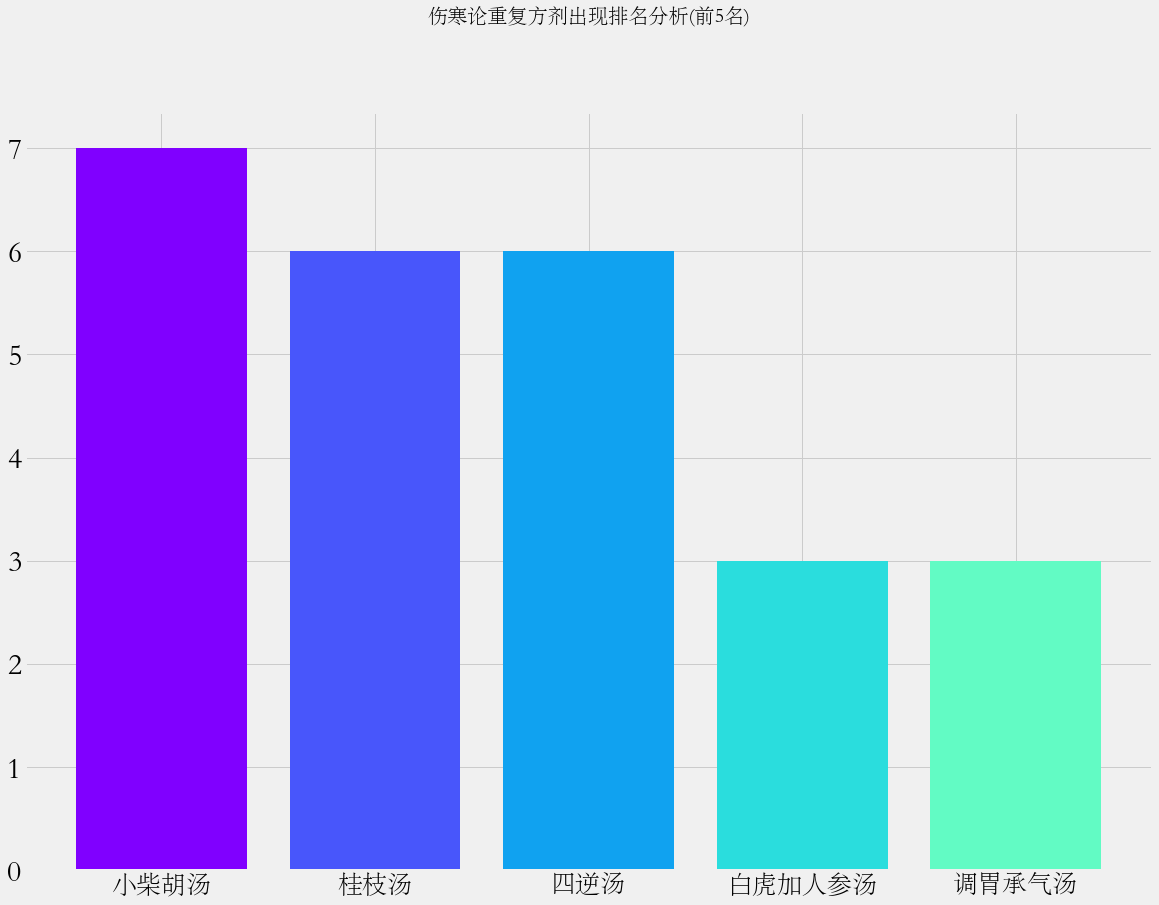

In [321]:
b1.count_fang_all()

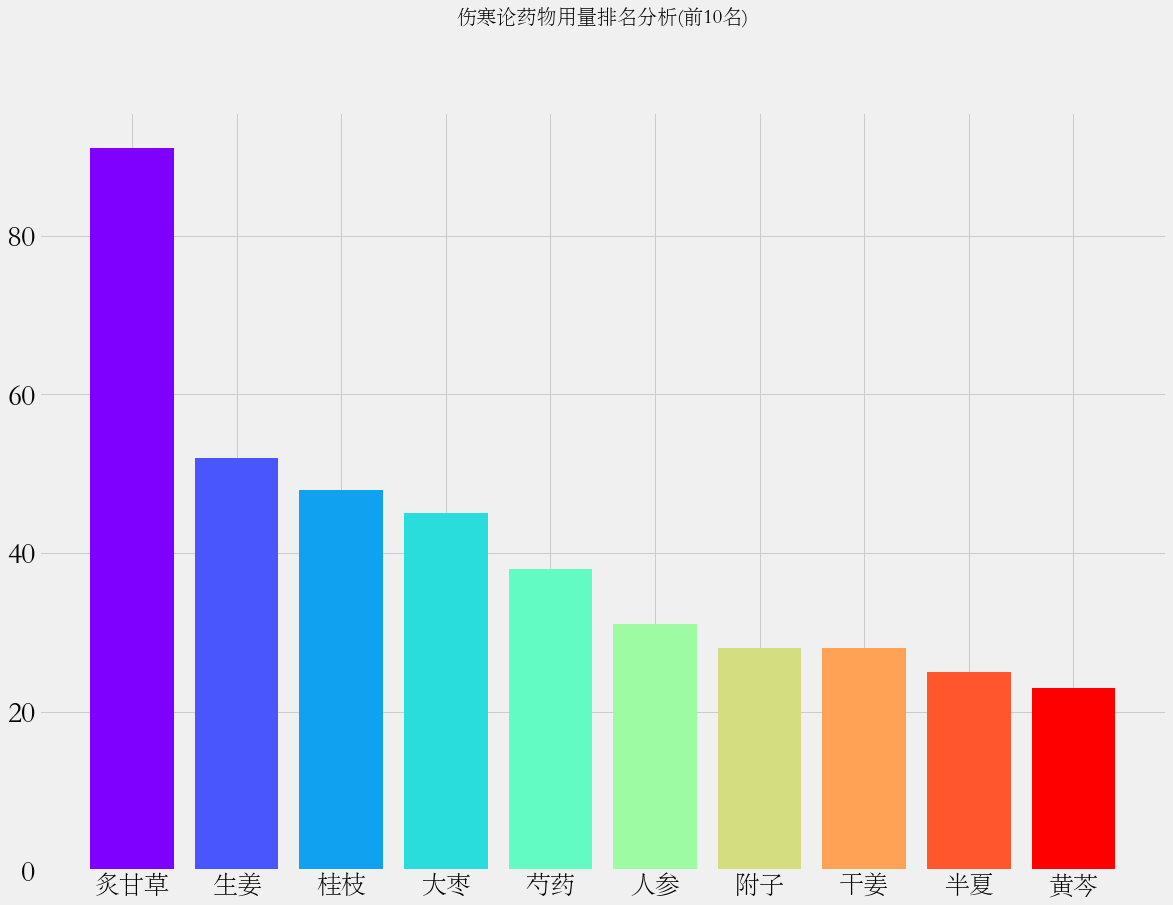

In [322]:
b1.count_yao_all_draw()

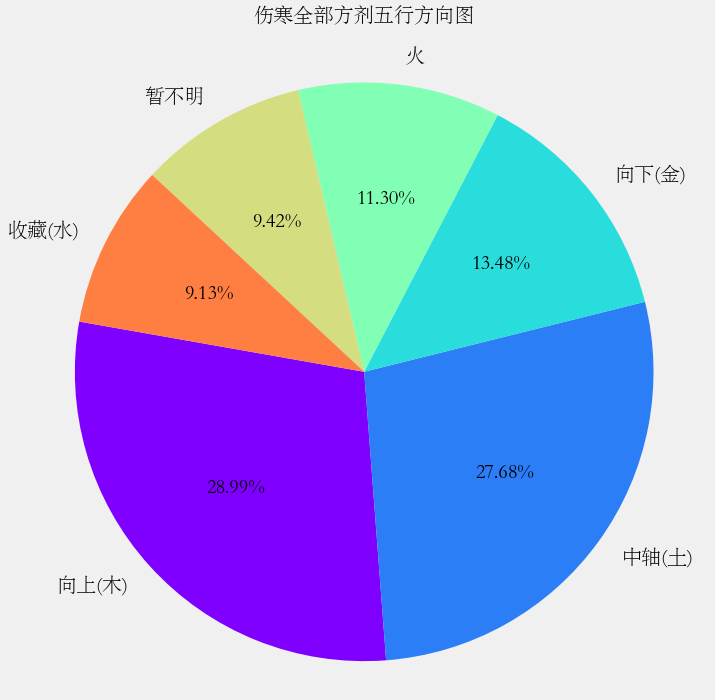

In [323]:
b1.draw_dir_all()